Using Distance Heuristic:
Optimal path from Chennai to Tirunelveli: ['Chennai', 'Trichy', 'Madurai', 'Coimbatore', 'Tirunelveli']


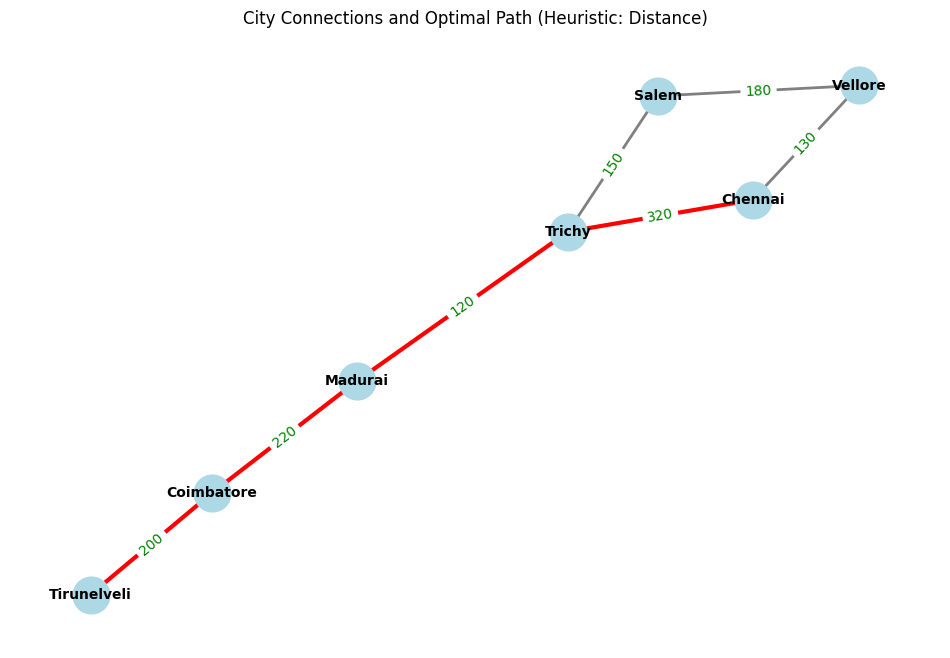


Using Time Heuristic:
Optimal path from Chennai to Tirunelveli: ['Chennai', 'Trichy', 'Madurai', 'Coimbatore', 'Tirunelveli']


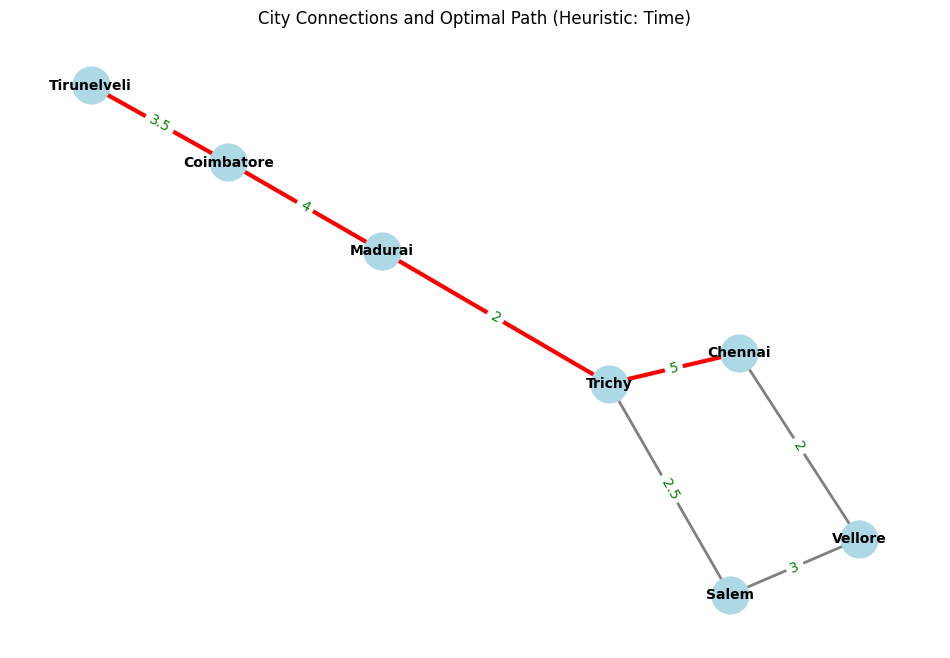

In [8]:
import heapq
import matplotlib.pyplot as plt
import networkx as nx

# Define the graph (adjacency list with distances and travel times)
graph = {
    'Chennai': {'Vellore': {'distance': 130, 'time': 2}, 'Trichy': {'distance': 320, 'time': 5}},
    'Vellore': {'Chennai': {'distance': 130, 'time': 2}, 'Salem': {'distance': 180, 'time': 3}},
    'Salem': {'Vellore': {'distance': 180, 'time': 3}, 'Trichy': {'distance': 150, 'time': 2.5}},
    'Trichy': {'Chennai': {'distance': 320, 'time': 5}, 'Salem': {'distance': 150, 'time': 2.5}, 'Madurai': {'distance': 120, 'time': 2}},
    'Madurai': {'Trichy': {'distance': 120, 'time': 2}, 'Coimbatore': {'distance': 220, 'time': 4}},
    'Coimbatore': {'Madurai': {'distance': 220, 'time': 4}, 'Tirunelveli': {'distance': 200, 'time': 3.5}},
    'Tirunelveli': {'Coimbatore': {'distance': 200, 'time': 3.5}}
}

# Heuristic functions (straight-line distance and estimated time to destination)
heuristic_distance = {
    'Chennai': 0,
    'Vellore': 130,
    'Salem': 200,
    'Trichy': 300,
    'Madurai': 460,
    'Coimbatore': 500,
    'Tirunelveli': 700
}

heuristic_time = {
    'Chennai': 0,
    'Vellore': 2,
    'Salem': 3,
    'Trichy': 5,
    'Madurai': 7,
    'Coimbatore': 9,
    'Tirunelveli': 12
}

# A* Algorithm
def a_star(graph, start, goal, heuristic_type='distance'):
    open_set = []
    heapq.heappush(open_set, (0, start))
    came_from = {}
    g_score = {city: float('inf') for city in graph}
    g_score[start] = 0
    f_score = {city: float('inf') for city in graph}

    # Set heuristic based on type
    if heuristic_type == 'distance':
        f_score[start] = heuristic_distance[start]
    elif heuristic_type == 'time':
        f_score[start] = heuristic_time[start]

    while open_set:
        _, current = heapq.heappop(open_set)

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1]

        for neighbor, edge_data in graph[current].items():
            tentative_g_score = g_score[current] + edge_data['distance'] if heuristic_type == 'distance' else g_score[current] + edge_data['time']
            if tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                if heuristic_type == 'distance':
                    f_score[neighbor] = tentative_g_score + heuristic_distance[neighbor]
                elif heuristic_type == 'time':
                    f_score[neighbor] = tentative_g_score + heuristic_time[neighbor]
                heapq.heappush(open_set, (f_score[neighbor], neighbor))

    return None

# Visualize the graph and optimal path
def visualize_graph(graph, path=None, heuristic_type='distance'):
    G = nx.Graph()

    # Add edges and weights to the graph
    for city, neighbors in graph.items():
        for neighbor, edge_data in neighbors.items():
            weight = edge_data['distance'] if heuristic_type == 'distance' else edge_data['time']
            G.add_edge(city, neighbor, weight=weight)

    # Draw the graph
    pos = nx.spring_layout(G)  # Positions for all nodes
    plt.figure(figsize=(12, 8))

    # Draw all edges
    nx.draw_networkx_edges(G, pos, edge_color='gray', width=2)

    # Highlight the optimal path if provided
    if path:
        path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=3)

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')

    # Draw labels
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

    # Draw edge weights
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='green')

    plt.title(f"City Connections and Optimal Path (Heuristic: {heuristic_type.capitalize()})")
    plt.axis('off')
    plt.show()

# Example usage
start_city = 'Chennai'
goal_city = 'Tirunelveli'

# Find the optimal path using A* with distance heuristic
print("Using Distance Heuristic:")
optimal_path_distance = a_star(graph, start_city, goal_city, heuristic_type='distance')
print(f"Optimal path from {start_city} to {goal_city}: {optimal_path_distance}")
visualize_graph(graph, optimal_path_distance, heuristic_type='distance')

# Find the optimal path using A* with time heuristic
print("\nUsing Time Heuristic:")
optimal_path_time = a_star(graph, start_city, goal_city, heuristic_type='time')
print(f"Optimal path from {start_city} to {goal_city}: {optimal_path_time}")
visualize_graph(graph, optimal_path_time, heuristic_type='time')

In [9]:
from itertools import permutations

def solve_cryptarithmetic():
    # Problem 1: SEND + MORE = MONEY
    def solve_send_more_money():
        letters = ('S', 'E', 'N', 'D', 'M', 'O', 'R', 'Y')
        for perm in permutations(range(10), len(letters)):
            S, E, N, D, M, O, R, Y = perm

            # Skip invalid cases where leading digits are zero
            if S == 0 or M == 0:
                continue

            # Convert words to numbers
            SEND = 1000 * S + 100 * E + 10 * N + D
            MORE = 1000 * M + 100 * O + 10 * R + E
            MONEY = 10000 * M + 1000 * O + 100 * N + 10 * E + Y

            # Check if the equation holds
            if SEND + MORE == MONEY:
                return {letter: digit for letter, digit in zip(letters, perm)}, SEND, MORE, MONEY
        return None, None, None, None

    # Problem 2: BASE + BALL = GAMES
    def solve_base_ball_games():
        letters = ('B', 'A', 'S', 'E', 'L', 'G', 'M')
        for perm in permutations(range(10), len(letters)):
            B, A, S, E, L, G, M = perm

            # Skip invalid cases where leading digits are zero
            if B == 0 or G == 0:
                continue

            # Convert words to numbers
            BASE = 1000 * B + 100 * A + 10 * S + E
            BALL = 1000 * B + 100 * A + 10 * L + L
            GAMES = 10000 * G + 1000 * A + 100 * M + 10 * E + S

            # Check if the equation holds
            if BASE + BALL == GAMES:
                return {letter: digit for letter, digit in zip(letters, perm)}, BASE, BALL, GAMES
        return None, None, None, None

    # Solve both problems
    print("Solving SEND + MORE = MONEY...")
    solution_send_more_money, SEND, MORE, MONEY = solve_send_more_money()
    if solution_send_more_money:
        print("Solution for SEND + MORE = MONEY:")
        print(solution_send_more_money)
        print(f"  {SEND} (SEND)")
        print(f"+ {MORE} (MORE)")
        print(f"-------")
        print(f" {MONEY} (MONEY)\n")
    else:
        print("No solution found for SEND + MORE = MONEY.\n")

    print("Solving BASE + BALL = GAMES...")
    solution_base_ball_games, BASE, BALL, GAMES = solve_base_ball_games()
    if solution_base_ball_games:
        print("Solution for BASE + BALL = GAMES:")
        print(solution_base_ball_games)
        print(f"  {BASE} (BASE)")
        print(f"+ {BALL} (BALL)")
        print(f"-------")
        print(f" {GAMES} (GAMES)\n")
    else:
        print("No solution found for BASE + BALL = GAMES.\n")

# Run the solver
solve_cryptarithmetic()

Solving SEND + MORE = MONEY...
Solution for SEND + MORE = MONEY:
{'S': 9, 'E': 5, 'N': 6, 'D': 7, 'M': 1, 'O': 0, 'R': 8, 'Y': 2}
  9567 (SEND)
+ 1085 (MORE)
-------
 10652 (MONEY)

Solving BASE + BALL = GAMES...
Solution for BASE + BALL = GAMES:
{'B': 7, 'A': 4, 'S': 8, 'E': 3, 'L': 5, 'G': 1, 'M': 9}
  7483 (BASE)
+ 7455 (BALL)
-------
 14938 (GAMES)

